
# Sold Prices in Tallkrogen

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from subprocess import check_output


### Call the Node Hemnet scraper which saves .json data file of sold properties in Tallkrogen

In [3]:
check_output(['npm', 'run start'])

CalledProcessError: Command '['node', '../hemnet-scraper/index.js']' returned non-zero exit status 1.

### Read in sold propertie json as dataframe

In [4]:
tallkrogen_sold_prices_df = pd.read_json("../data/salesData.json", dtype={
    'address': "string",
    'soldDate': "string",
    'livingArea': int,
    'extraArea': int,
    'land': int,
    'rooms': int,
    'houseType': "string",
    'assignment': "string",
    'askingPrice': int,
    'soldPrice': int
})


In [5]:
tallkrogen_sold_prices_df.head(50)

,address,soldDate,livingArea,extraArea,land,rooms,houseType,assignment,askingPrice,soldPrice
0,Rapphönsvägen 33,2019-08-09,90,90,468,8,Villa,Äganderätt,6000000,6405000
1,Olympiavägen 40,2018-09-27,50,50,501,4,Villa,Äganderätt,4995000,5525000
2,Mörkövägen 56,2019-10-24,90,89,591,5,Villa,Äganderätt,5750000,7325000
3,Rapphönsvägen 20,2018-04-26,64,62,481,4,Villa,Äganderätt,4995000,5400000
4,Herrhagsvägen 126,2019-11-26,67,62,577,5,Villa,Äganderätt,5950000,6125000
5,Amatörvägen 47,2018-11-01,86,75,502,6,Villa,Äganderätt,6975000,7750000
6,Polovägen 22,2018-05-30,95,80,508,6,Villa,Äganderätt,6800000,6800000
7,Maratonvägen 119,2018-11-01,73,51,488,5,Villa,Äganderätt,5250000,6700000
8,Lingvägen 65,2018-10-05,88,44,502,5,Villa,Äganderätt,5450000,5940000
9,Hanvedsgatan 8,2018-11-15,69,65,459,3,Villa,Äganderätt,4595000,5000000


In [6]:
tallkrogen_sold_prices_df.shape

(211, 10)

In [7]:
tallkrogen_sold_prices_df.dtypes

address        object
soldDate       object
livingArea     object
extraArea      object
land           object
rooms          object
houseType      object
assignment     object
askingPrice    object
soldPrice       int64
dtype: object

In [8]:
def checkAttribute(row): 
    try:
        str(row["address"])
    except:
        return False
    try:
        str(row["soldDate"])
    except:
        return False
    try:
        float(row["livingArea"])
    except:
        return False
    try:
        float(row["extraArea"])
    except:
        return False
    try:
        float(row["land"])
    except:
        return False
    try:
        float(row["rooms"])
    except:
        return False
    try:
        str(row["houseType"])
    except:
        return False
    try:
        str(row["assignment"])
    except:
        return False
    try:
        float(row["askingPrice"])
    except:
        return False
    try:
        float(row["soldPrice"])
    except:
        return False
    return True

In [9]:
for index, row in tallkrogen_sold_prices_df.iterrows():
    if checkAttribute(row) == False:
        tallkrogen_sold_prices_df.drop(index=index, inplace=True)

In [10]:
tallkrogen_sold_prices_df.head(50)

,address,soldDate,livingArea,extraArea,land,rooms,houseType,assignment,askingPrice,soldPrice
0,Rapphönsvägen 33,2019-08-09,90,90,468,8,Villa,Äganderätt,6000000,6405000
1,Olympiavägen 40,2018-09-27,50,50,501,4,Villa,Äganderätt,4995000,5525000
2,Mörkövägen 56,2019-10-24,90,89,591,5,Villa,Äganderätt,5750000,7325000
3,Rapphönsvägen 20,2018-04-26,64,62,481,4,Villa,Äganderätt,4995000,5400000
4,Herrhagsvägen 126,2019-11-26,67,62,577,5,Villa,Äganderätt,5950000,6125000
5,Amatörvägen 47,2018-11-01,86,75,502,6,Villa,Äganderätt,6975000,7750000
6,Polovägen 22,2018-05-30,95,80,508,6,Villa,Äganderätt,6800000,6800000
7,Maratonvägen 119,2018-11-01,73,51,488,5,Villa,Äganderätt,5250000,6700000
8,Lingvägen 65,2018-10-05,88,44,502,5,Villa,Äganderätt,5450000,5940000
9,Hanvedsgatan 8,2018-11-15,69,65,459,3,Villa,Äganderätt,4595000,5000000


In [11]:
tallkrogen_sold_prices_df.shape

(200, 10)

In [12]:
tallkrogen_sold_prices_df['soldDate'] = pd.to_datetime(tallkrogen_sold_prices_df['soldDate'])

In [13]:
tallkrogen_sold_prices_df.head(50)

,address,soldDate,livingArea,extraArea,land,rooms,houseType,assignment,askingPrice,soldPrice
0,Rapphönsvägen 33,2019-08-09,90,90,468,8,Villa,Äganderätt,6000000,6405000
1,Olympiavägen 40,2018-09-27,50,50,501,4,Villa,Äganderätt,4995000,5525000
2,Mörkövägen 56,2019-10-24,90,89,591,5,Villa,Äganderätt,5750000,7325000
3,Rapphönsvägen 20,2018-04-26,64,62,481,4,Villa,Äganderätt,4995000,5400000
4,Herrhagsvägen 126,2019-11-26,67,62,577,5,Villa,Äganderätt,5950000,6125000
5,Amatörvägen 47,2018-11-01,86,75,502,6,Villa,Äganderätt,6975000,7750000
6,Polovägen 22,2018-05-30,95,80,508,6,Villa,Äganderätt,6800000,6800000
7,Maratonvägen 119,2018-11-01,73,51,488,5,Villa,Äganderätt,5250000,6700000
8,Lingvägen 65,2018-10-05,88,44,502,5,Villa,Äganderätt,5450000,5940000
9,Hanvedsgatan 8,2018-11-15,69,65,459,3,Villa,Äganderätt,4595000,5000000


In [14]:
tallkrogen_sold_prices_df["soldDate"]

0     2019-08-09
1     2018-09-27
2     2019-10-24
3     2018-04-26
4     2019-11-26
         ...    
206   2020-01-29
207   2019-05-14
208   2019-06-12
209   2015-05-30
210   2014-10-09
Name: soldDate, Length: 200, dtype: datetime64[ns]

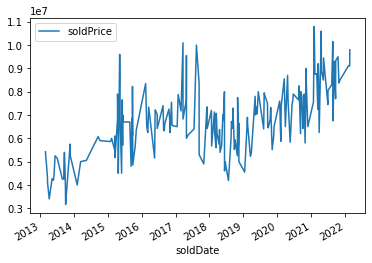

In [28]:
tallkrogen_sold_prices_df.plot(x='soldDate', y="soldPrice")

In [16]:
tallkrogen_sold_prices_df["price_per_sq_meter"] = tallkrogen_sold_prices_df["soldPrice"].astype(int) / (tallkrogen_sold_prices_df["livingArea"].astype(int) + (tallkrogen_sold_prices_df["extraArea"].astype(int)/ 2))






In [29]:
tallkrogen_sold_prices_df["soldPrice"].astype(int)

0      6405000
1      5525000
2      7325000
3      5400000
4      6125000
        ...   
206    7600000
207    7000000
208    8000000
209    4500000
210    5900000
Name: soldPrice, Length: 200, dtype: int64

In [17]:
tallkrogen_sold_prices_df.head()

,address,soldDate,livingArea,extraArea,land,rooms,houseType,assignment,askingPrice,soldPrice,price_per_sq_meter
0,Rapphönsvägen 33,2019-08-09,90,90,468,8,Villa,Äganderätt,6000000,6405000,47444.444444
1,Olympiavägen 40,2018-09-27,50,50,501,4,Villa,Äganderätt,4995000,5525000,73666.666667
2,Mörkövägen 56,2019-10-24,90,89,591,5,Villa,Äganderätt,5750000,7325000,54460.966543
3,Rapphönsvägen 20,2018-04-26,64,62,481,4,Villa,Äganderätt,4995000,5400000,56842.105263
4,Herrhagsvägen 126,2019-11-26,67,62,577,5,Villa,Äganderätt,5950000,6125000,62500.000000


In [18]:
tallkrogen_sold_prices_2021_df = tallkrogen_sold_prices_df[tallkrogen_sold_prices_df["soldDate"] >= "2021"]

In [19]:
tallkrogen_sold_prices_2021_df.shape

(28, 11)

Text(0, 0.5, 'price_per_sq_meter')

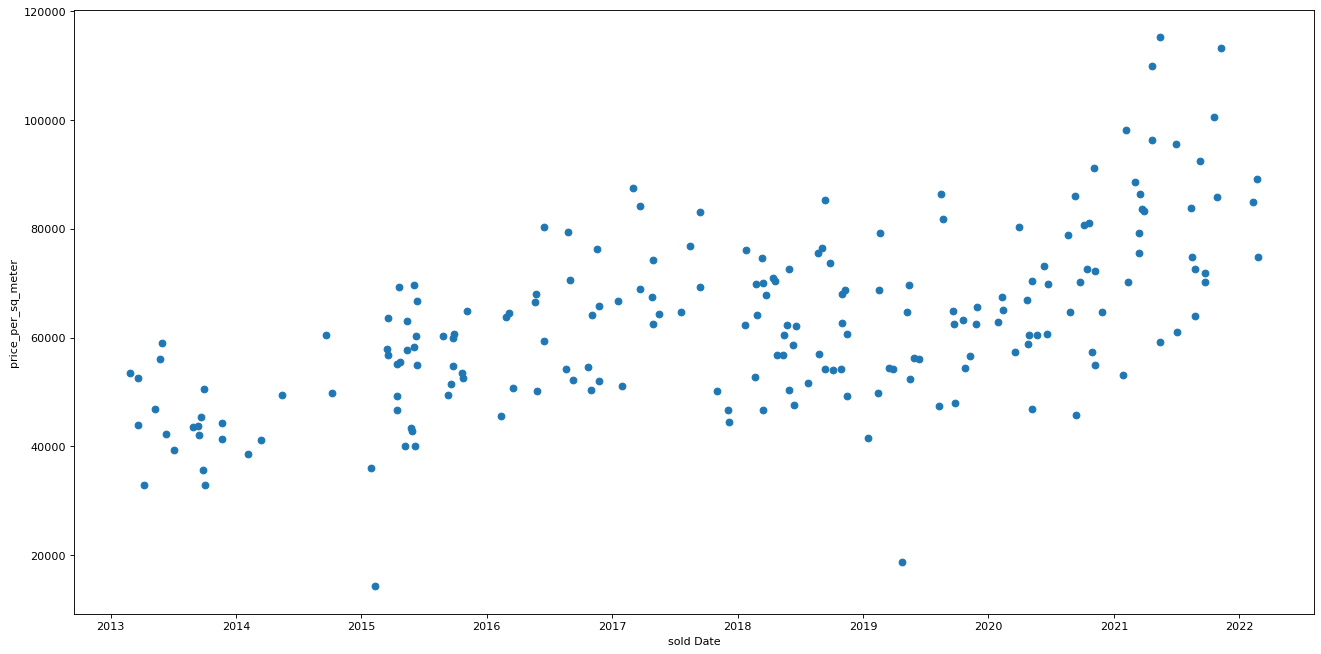

In [20]:
plt.figure(figsize=(20, 10), dpi=80)
plt.scatter(x=tallkrogen_sold_prices_df["soldDate"], y=tallkrogen_sold_prices_df["price_per_sq_meter"])
plt.xlabel("sold Date")
plt.ylabel("price_per_sq_meter")

Text(0, 0.5, 'price_per_sq_meter')

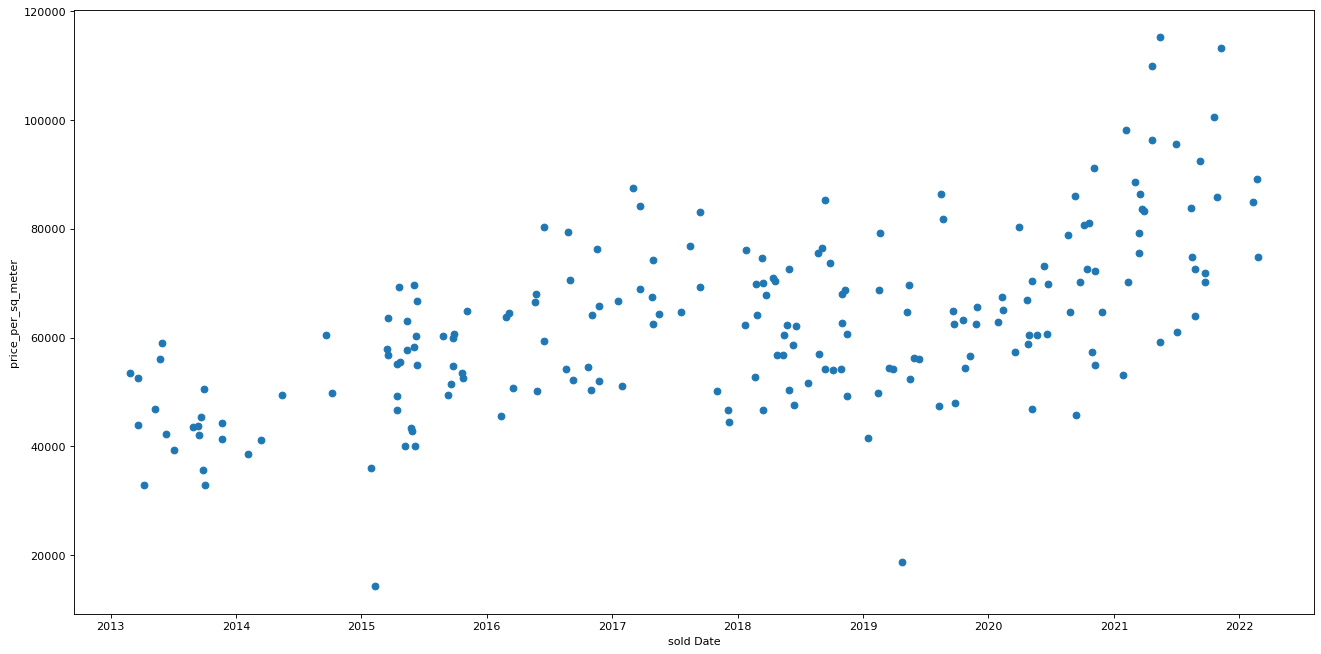

In [21]:
plt.figure(figsize=(20, 10), dpi=80)
plt.scatter(x=tallkrogen_sold_prices_df["soldDate"], y=tallkrogen_sold_prices_df["price_per_sq_meter"])
plt.xlabel("sold Date")
plt.ylabel("price_per_sq_meter")

In [22]:
X = tallkrogen_sold_prices_df[["livingArea", "extraArea", "land", "rooms"]]
y = tallkrogen_sold_prices_df["soldPrice"]
reg = LinearRegression().fit(X, y)

In [23]:
reg.predict([[92, 51, 336, 5]])

array([7442954.49998506])

In [31]:
tallkrogen_sold_prices_df["soldDate"].dt.year

0      2019
1      2018
2      2019
3      2018
4      2019
       ... 
206    2020
207    2019
208    2019
209    2015
210    2014
Name: soldDate, Length: 200, dtype: int64

In [33]:
tallkrogen_sold_prices_df["soldYear"] = tallkrogen_sold_prices_df["soldDate"].dt.year

X = tallkrogen_sold_prices_df[["livingArea", "extraArea", "land", "rooms", "soldYear"]]
y = tallkrogen_sold_prices_df["soldPrice"]
reg = LinearRegression().fit(X, y)

reg.predict([[92, 51, 336, 5, 2022]])

array([8956197.08602917])

In [38]:

X = tallkrogen_sold_prices_df[["livingArea", "extraArea", "land", "rooms", "soldYear"]]
y = tallkrogen_sold_prices_df["soldPrice"]
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X, y)
regr.predict([[92, 51, 336, 5, 2022]])

array([7493347.72833026])

In [36]:
X = tallkrogen_sold_prices_2021_df[["livingArea", "extraArea", "land", "rooms"]]
y = tallkrogen_sold_prices_2021_df["soldPrice"]
reg = LinearRegression().fit(X, y)

In [25]:
reg.predict([[92, 51, 336, 5]])

array([9060868.10924936])

Text(0, 0.5, 'Date')

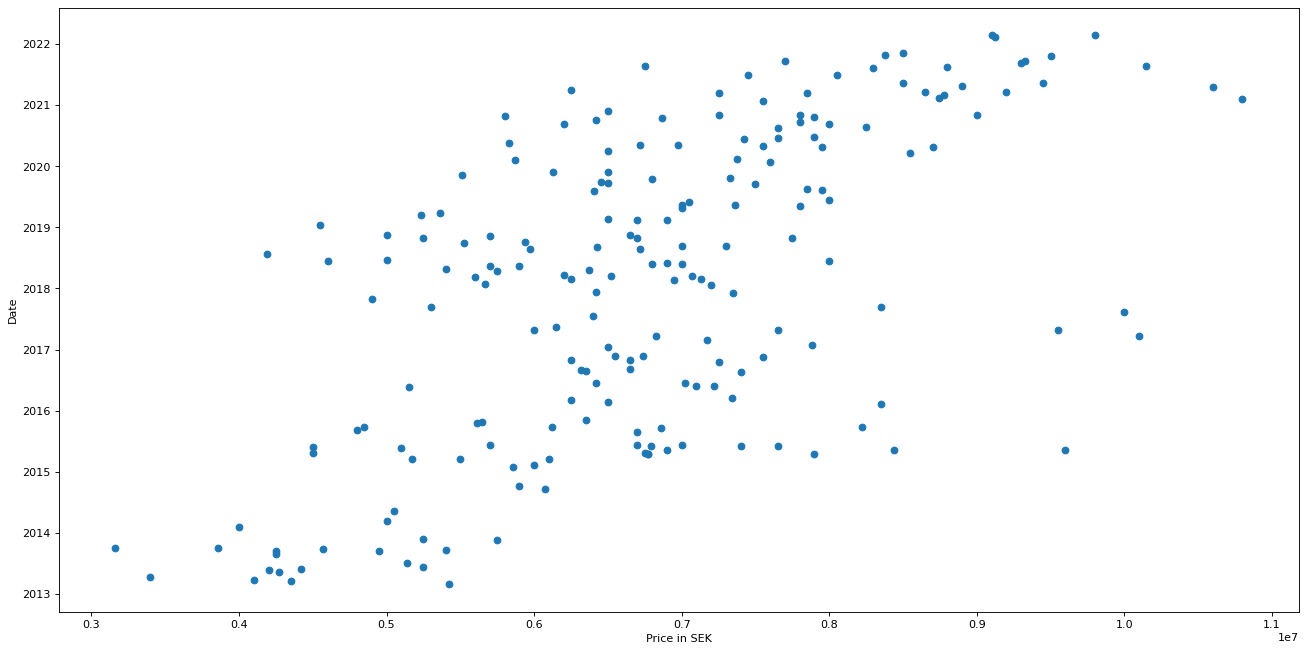

In [26]:
plt.figure(figsize=(20, 10), dpi=80)
plt.scatter(x=tallkrogen_sold_prices_df["soldPrice"], y=tallkrogen_sold_prices_df["soldDate"])
plt.xlabel("Price in SEK")
plt.ylabel("Date")

In [27]:
X = tallkrogen_sold_prices_df[["houseArea"]]
y = tallkrogen_sold_prices_df["soldPrice"]
reg = LinearRegression().fit(X, y)

KeyError: "None of [Index(['houseArea'], dtype='object')] are in the [columns]"

In [ ]:
y_predict = reg.predict(X)


In [ ]:
reg.predict([[147]])

In [ ]:

plt.figure(figsize=(20, 10), dpi=80)
plt.scatter(x=tallkrogen_sold_prices_df["soldPrice"], y=tallkrogen_sold_prices_df["houseArea"])
plt.xlabel("Price in SEK")
plt.ylabel("Sq Foot Area")
plt.plot(X["houseArea"], y_predict, '-r', label='linear regression')


In [ ]:
X = tallkrogen_sold_prices_df[["soldPrice"]]
y = tallkrogen_sold_prices_df["soldDate"]
reg = LinearRegression().fit(X, y)

In [ ]:
y_predict = reg.predict(X)

In [ ]:
plt.figure(figsize=(20, 10), dpi=80)
plt.scatter(x=tallkrogen_sold_prices_df["soldPrice"], y=tallkrogen_sold_prices_df["soldDate"])
plt.xlabel("Price in SEK")
plt.ylabel("Date")
plt.plot(X["soldPrice"], y_predict, '-r', label='linear regression')

## 